In [37]:
import pandas as pd
import numpy as np

In [3]:
df_filtered = pd.read_csv('events/df_filtered_reg.csv')
df_filtered.head()

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,views_baseline_z,view_country_article_z,bing_hits_z,worldwide,view_country_article_log,views_baseline_log,bing_hits_log,GDP_pc_log,GDP_log,population_log
0,Q100021,Pakistan International Airlines Flight 661,2016-12-07,Global South,Pakistan,Asia,disaster,"['Category:2016 disasters in Pakistan', 'Categ...",248274,0.000000,...,-0.357773,0.047392,-0.254236,True,9.531699,18.279578,2.484907,7.218074,26.349163,19.131822
1,Q100231328,Gretchen Whitmer kidnapping plot,2020-10-08,Global North,United States,North America,disaster,"['Category:2020 crimes in the United States', ...",74144,0.000000,...,2.638912,2.488632,-0.231641,True,10.782035,21.866772,8.805525,11.052850,30.670471,19.613039
2,Q100256872,Killing of Babu Lal Vaishnav,2020-10-08,Global South,India,Asia,disaster,"['Category:2020 crimes in India', 'Category:20...",427,0.000000,...,0.258512,1.459713,-0.254161,True,10.424273,20.386781,3.526361,7.566296,28.611131,21.045353
3,Q100279235,Miss Vietnam 2020,2020-11-20,Global South,Vietnam,Asia,culture,"['Category:2020 beauty pageants', 'Category:Be...",1444,49.285714,...,-0.427167,-0.312563,-0.103955,True,9.073833,16.599904,10.698763,7.932622,26.325969,18.393706
4,Q100288161,2020 Ganja missile attacks,2020-10-11,Global South,Azerbaijan,Asia,disaster,"['Category:2020 in Azerbaijan', 'Category:Arti...",7410,0.000000,...,-0.440036,-0.495525,0.549913,True,8.724045,14.943035,12.375820,8.343609,24.475289,16.127365


In [4]:
from regression import fit_nb_with_estimated_alpha, estimate_alpha, fit_nb, standardize_var, fit_nb_with_estimated_alpha_all_codes

In [12]:
df_train = df_filtered[(df_filtered.year>2015) & (df_filtered.year<2020)]
df_train.describe()

,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,diff_days,year,edits_7_sum,...,pop_z,views_baseline_z,view_country_article_z,bing_hits_z,view_country_article_log,views_baseline_log,bing_hits_log,GDP_pc_log,GDP_log,population_log
count,1.240800e+04,12408.000000,1.240800e+04,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,...,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000
mean,2.400789e+04,664.321518,4.571332e+03,1235.838975,388.863395,571.539652,626.878224,-153.653288,2017.402563,35.694632,...,-0.009064,-0.059259,-0.054945,-0.010476,8.851768,16.598648,6.925594,10.018427,27.887634,17.867399
std,1.148904e+05,3894.773913,2.724305e+04,7085.553257,2558.290441,3382.634786,4098.124015,369.051755,1.120391,118.642942,...,1.006410,0.920211,0.929184,0.949371,1.169000,3.201343,4.015669,1.070390,1.903915,1.601702
min,1.100000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-35168.000000,-5694.000000,2016.000000,0.000000,...,-0.580010,-0.443069,-0.932146,-0.254273,1.386294,0.000000,0.000000,4.676027,17.665728,9.256747
25%,3.657500e+02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-143.000000,2016.000000,1.000000,...,-0.472105,-0.441583,-0.684570,-0.254185,8.157191,14.229606,3.295837,9.183352,26.881584,17.196590
50%,1.942500e+03,25.000000,9.400000e+01,41.000000,10.000000,20.000000,0.000000,-16.000000,2017.000000,7.000000,...,-0.339174,-0.417844,-0.378642,-0.242787,8.961109,17.061301,8.127403,10.448883,28.216412,17.999263
75%,1.037725e+04,191.428571,1.193000e+03,374.000000,87.000000,148.000000,200.000000,0.000000,2018.000000,27.000000,...,0.176821,-0.234680,0.178796,-0.158924,9.657547,19.172850,10.243560,10.748460,28.688351,19.144178
max,5.580333e+06,188749.000000,1.321243e+06,351786.000000,134559.000000,150619.000000,208963.000000,1716.000000,2019.000000,3887.000000,...,4.588088,2.925758,2.631236,26.653740,10.822873,21.955765,15.886164,12.152185,30.693130,21.065255


In [11]:
df_test = df_filtered[(df_filtered.year>2019)]
df_test.describe()

,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,diff_days,year,edits_7_sum,...,pop_z,views_baseline_z,view_country_article_z,bing_hits_z,view_country_article_log,views_baseline_log,bing_hits_log,GDP_pc_log,GDP_log,population_log
count,1.859000e+03,1859.000000,1.859000e+03,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.0,1859.000000,...,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
mean,3.395319e+04,780.984606,5.384425e+03,1496.773534,480.345347,653.286175,833.826251,-264.048413,2020.0,34.350188,...,-0.010868,0.396938,0.375921,0.080564,9.103552,17.274524,7.164676,10.215851,28.166833,17.946782
std,2.396105e+05,5223.522735,3.655434e+04,11533.794771,3560.170040,4023.196753,8001.865799,511.227494,0.0,110.626183,...,0.760605,1.344710,1.342000,1.267873,1.386028,3.718337,3.997477,1.124403,2.273984,1.658173
min,1.100000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-10771.000000,-5478.000000,2020.0,0.000000,...,-0.579982,-0.443068,-0.932074,-0.254273,1.609438,6.908755,0.000000,4.777937,19.013531,9.803280
25%,5.220000e+02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-285.000000,2020.0,0.000000,...,-0.485745,-0.441472,-0.685769,-0.254202,8.152341,14.301942,3.091042,10.039400,26.980668,17.061497
50%,2.776000e+03,53.428571,3.060000e+02,95.000000,22.000000,41.000000,22.000000,-60.000000,2020.0,7.000000,...,-0.333286,-0.401540,-0.265028,-0.238732,9.147720,17.559848,8.429673,10.614456,28.266915,18.023411
75%,1.230200e+04,327.500000,2.159500e+03,630.000000,173.500000,280.500000,293.000000,-1.000000,2020.0,29.000000,...,0.629559,0.258512,1.412214,-0.131270,10.404217,20.386781,10.498221,11.052850,30.670471,19.613039
max,7.847440e+06,186775.857143,1.307431e+06,443489.000000,126206.000000,134859.000000,316295.000000,222.000000,2020.0,2084.000000,...,4.599778,2.952666,3.047678,22.446182,10.933393,21.963720,15.716125,12.101979,30.670471,21.067514


In [56]:
nb_fit_dict = fit_nb_with_estimated_alpha_all_codes(
                ['en', 'es', 'de', 'it'], df_train, 
                'views_7_sum ~ C(cat, Treatment(reference="sports")) + GDP_pc_log + views_baseline_log', 
                est_method='lbfgs', output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Estimated alpha as 12.585330548778094 (p=0.0004949730808883184)
Deviance: 1972.42 | Null-deviance: 2077.91
Pseudo ChiSq: 7669.03 | Good-Fit-ChiSq): 6438.07
Pseudo R² (1 - D/D_0) = 0.0508
H0: Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.2265
________________________________________________________________________________________________
================= Fitting es =================
Estimated alpha as 19.103700365072275 (p=0.008179726862312433)
Deviance: 553.66 | Null-deviance: 586.93
Pseudo ChiSq: 3395.83 | Good-Fit-ChiSq): 2805.64
Pseudo R² (1 - D/D_0) = 0.0567
H0: Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.2652
________________________________________________________________________________________________
================= Fitting de =================
Estimated alpha as 5.52535466211697 (p=

18077.916844327905


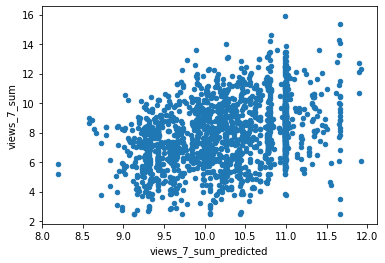

In [57]:
nb_predict_dict = {}
for code, nb_fit in nb_fit_dict.items():
    nb_predict_dict[code] = nb_fit.predict(df_test, linear=True)
df_predict = pd.concat([np.log1p(df_test.views_7_sum), nb_predict_dict['en'].rename('views_7_sum_predicted')], axis=1)
df_predict['diff_pred'] = df_predict.views_7_sum - df_predict.views_7_sum_predicted
mse_predicted = np.sum(df_predict.diff_pred * df_predict.diff_pred)
print(mse_predicted)
df_predict.plot(x='views_7_sum_predicted', y='views_7_sum', kind='scatter')

In [59]:
nb_fit_dict2 = fit_nb_with_estimated_alpha_all_codes(
                ['en', 'es', 'de', 'it'], df_train, 
                'views_7_sum ~ C(cat, Treatment(reference="sports")) + GDP_pc_log + views_baseline_log + population_log + view_country_article_z + gni_region + bing_hits_log', 
                est_method='lbfgs', output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Estimated alpha as 11.138114267687593 (p=0.0005827848538682285)
Deviance: 2140.84 | Null-deviance: 2347.90
Pseudo ChiSq: 7702.31 | Good-Fit-ChiSq): 6428.94
Pseudo R² (1 - D/D_0) = 0.0882
H0: Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.2336
________________________________________________________________________________________________
================= Fitting es =================
Estimated alpha as 12.820347569326707 (p=3.784754896030635e-08)
Deviance: 734.79 | Null-deviance: 874.57
Pseudo ChiSq: 3185.34 | Good-Fit-ChiSq): 2796.44
Pseudo R² (1 - D/D_0) = 0.1598
H0: Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.1908
________________________________________________________________________________________________
================= Fitting de =================
Estimated alpha as 4.036753355760381 (

In [68]:
df_test.columns

Index(['event_id', 'pagetitle', 'event_date', 'economic_region', 'country',
       'continent', 'cat', 'categories', 'views_7_sum', 'views_before_mean',
       'views_before_sum', 'views_before_max', 'views_before_min',
       'views_before_median', 'views_before_increase', 'list_views_7_days',
       'diff_days', 'year', 'planed', 'surprising', 'factor', 'page_creation',
       'edits_7_sum', 'edits_before_min', 'edits_before_mean',
       'edits_before_max', 'edits_before_median', 'edits_before_sum', 'code',
       'bing_hits', 'gni_class', 'gni_region', 'population', 'Country/Area',
       'Year', 'GDP_pc', 'GDP', 'oecd', 'date_month', 'views_baseline',
       'in_code_lang', 'in_code_region', 'views_baseline_cat',
       'view_country_article', 'GDP_pc_z', 'gdp_z', 'pop_z',
       'views_baseline_z', 'view_country_article_z', 'bing_hits_z',
       'worldwide', 'view_country_article_log', 'views_baseline_log',
       'bing_hits_log', 'GDP_pc_log', 'GDP_log', 'population_log'],
     

17539.600947152954


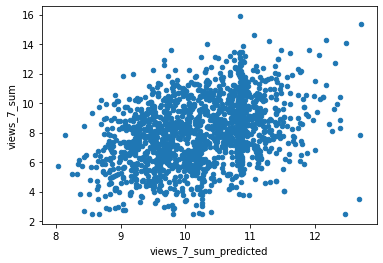

In [83]:
nb_predict_dict2 = {}
for code, nb_fit in nb_fit_dict2.items():
    nb_predict_dict2[code] = nb_fit.predict(df_test, linear=True)
    
df_predict2 = pd.concat([df_test.pagetitle, np.log1p(df_test.views_7_sum), nb_predict_dict2['en'].rename('views_7_sum_predicted')], axis=1)
df_predict2['diff_sqr_pred'] = np.square(df_predict2.views_7_sum - df_predict2.views_7_sum_predicted)
mse_predicted2 = df_predict2['diff_sqr_pred'].sum()
print(mse_predicted2)
df_predict2.plot(x='views_7_sum_predicted', y='views_7_sum', kind='scatter')

In [107]:
nb_fit.get_prediction?

Signature:
nb_fit.get_prediction(
    exog=None,
    exposure=None,
    offset=None,
    transform=True,
    linear=False,
    row_labels=None,
)
Docstring:
compute prediction results

Parameters
----------
exog : array_like, optional
    The values for which you want to predict.
transform : bool, optional
    If the model was fit via a formula, do you want to pass
    exog through the formula. Default is True. E.g., if you fit
    a model y ~ log(x1) + log(x2), and transform is True, then
    you can pass a data structure that contains x1 and x2 in
    their original form. Otherwise, you'd need to log the data
    first.
weights : array_like, optional
    Weights interpreted as in WLS, used for the variance of the predicted
    residual.
*args :
    Some models can take additional arguments. See the
    predict method of the model for the details.
**kwargs :
    Some models can take additional keyword arguments. See the
    predict method of the model for the details.

Returns
-------

In [105]:
nb_fit.get_prediction(df_test, linear=True).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,4.799681e+10,1.958392e+11,1.614706e+07,1.426695e+14
1,2.202784e+07,5.919622e+07,1.136336e+05,4.270089e+09
2,6.907812e+04,3.994458e+04,2.223982e+04,2.145605e+05
3,2.393165e+04,1.288307e+04,8.331963e+03,6.873815e+04
4,6.872547e+07,1.825669e+08,3.766426e+05,1.254024e+10
...,...,...,...,...
1854,8.251488e+03,4.474307e+03,2.850852e+03,2.388305e+04
1855,2.457036e+07,5.386163e+07,3.345492e+05,1.804526e+09
1856,2.457036e+07,5.386163e+07,3.345492e+05,1.804526e+09
1857,8.101529e+03,5.604034e+03,2.088186e+03,3.143148e+04


In [78]:
df_predict2

,pagetitle,views_7_sum,views_7_sum_predicted,diff_pred
1,Gretchen Whitmer kidnapping plot,11.213778,12.175122,-0.961344
2,Killing of Babu Lal Vaishnav,6.059123,11.764551,-5.705428
3,Miss Vietnam 2020,7.275865,10.323325,-3.047460
4,2020 Ganja missile attacks,8.910721,11.034152,-2.123431
5,50th Kerala State Film Awards,7.969358,10.632742,-2.663384
...,...,...,...,...
14779,Miss Perú 2020,7.751905,10.384550,-2.632645
14795,2020 Guernsey general election,8.829519,10.592847,-1.763328
14796,2020 Guernsey general election,8.829519,10.592847,-1.763328
14797,2020 Niuean general election,7.994970,9.520210,-1.525240


In [92]:
df_test[df_test.pagetitle=='Reactions to the murder of George Floyd']

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,views_baseline_z,view_country_article_z,bing_hits_z,worldwide,view_country_article_log,views_baseline_log,bing_hits_log,GDP_pc_log,GDP_log,population_log
7488,Q97357872,Reactions to the murder of George Floyd,2020-05-25,Global North,United States,North America,disaster,['Category:Aftermath of the George Floyd prote...,11,0.0,...,2.950679,2.924152,-0.174872,True,10.901865,21.963135,10.060534,11.05285,30.670471,19.613039


In [91]:
df_predict2.loc[df_predict2['diff_sqr_pred'].nlargest(20).index]

,pagetitle,views_7_sum,views_7_sum_predicted,diff_sqr_pred
7488,Reactions to the murder of George Floyd,2.484907,12.466833,99.638857
7368,COVID-19 pandemic in New York (state),3.465736,12.681489,84.930104
6744,Athletics at the 2020 Summer Olympics – Women'...,2.484907,10.251725,60.323463
14668,Final de la Copa de la Reina de Fútbol 2019-20,2.639057,10.402229,60.266828
6691,Athletics at the 2020 Summer Olympics – Men's ...,2.564949,10.209852,58.444534
14480,Trofeo Mundial de Rugby Juvenil 2020,2.484907,10.125828,58.383687
6262,2021 Manchester City Council election,4.043051,11.515773,55.841564
6263,2021 Manchester City Council election,4.043051,11.515773,55.841564
14634,Gran Premio de Fráncfort 2020,2.484907,9.811681,53.681618
6689,Athletics at the 2020 Summer Olympics – Women'...,3.044522,10.263722,52.116841


In [67]:
df_predict2.loc[7488]

views_7_sum               2.484907
views_7_sum_predicted    12.466833
diff_pred                -9.981927
Name: 7488, dtype: float64

In [75]:
df_test.reset_index()['index']

0           1
1           2
2           3
3           4
4           5
        ...  
1854    14779
1855    14795
1856    14796
1857    14797
1858    14798
Name: index, Length: 1859, dtype: int64

In [99]:
def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)


In [98]:


df_predict[['views_7_sum', 'views_7_sum_predicted']].corr()

,views_7_sum,views_7_sum_predicted
views_7_sum,1.000000,0.354288
views_7_sum_predicted,0.354288,1.000000


In [102]:
r_squared( df_predict2.views_7_sum_predicted, df_predict2.views_7_sum)

-14.708862251195065

In [63]:
df_test[df_test.index][1112]

event_id                                                            Q80598355
pagetitle                               Parlamentswahlen in der Mongolei 2020
event_date                                                         2020-06-24
economic_region                                                  Global South
country                                                              Mongolia
continent                                                                Asia
cat                                                                  politics
categories                  ['Kategorie:Parlamentswahl 2020', 'Kategorie:W...
views_7_sum                                                               457
views_before_mean                                                           0
views_before_sum                                                            0
views_before_max                                                            0
views_before_min                                                